# EM Algorithm

In [24]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import scipy as sc
from scipy import random, linalg, stats, special
from itertools import permutations

## 1. 각 class별로 선택될 확률을 기반으로 sample 뽑기

### symmetric positive definite matrix 만드는 함수

In [25]:
def makeSDmatrix(n,sd):
    M = np.matrix(np.random.rand(n,n))
    M = 0.5*(M + M.T)
    M = M + sd*np.eye(n)
    return M

### class 별 mean, covariacne 설정

In [26]:
# 차원 수
Ndim = 2
# class 수
NClasses = 3
# nsample : 전체 데이터 갯수
Nsample = 150
# class 별 뽑히는 확률 같게 하려면 '1'로 설정
same_probability = 1
# Mean
Mu = [np.random.uniform(0.0, 50.0, Ndim) for i in range(1,NClasses+1)]

# Covariance
SDClass = np.random.uniform(1.0,10.0,NClasses)
#print('SDClass : ',SDClass)
Cov = [makeSDmatrix(Ndim,i) for i in SDClass]

print ('Means of the classes')
for i in range(0,NClasses):
    print (['Means for Class ' + str(i+1)], Mu[i])
print ('\n')
print('Variances of the classes')
for i in range(0,NClasses):
    print (['the variance for Class ' + str(i+1)])
    print (Cov[i])

Means of the classes
['Means for Class 1'] [ 8.37686321 34.0900392 ]
['Means for Class 2'] [38.35920748  4.89176829]
['Means for Class 3'] [35.72596848 37.14536132]


Variances of the classes
['the variance for Class 1']
[[10.1735151   0.42426091]
 [ 0.42426091  9.97443803]]
['the variance for Class 2']
[[8.66432542 0.35417165]
 [0.35417165 8.58652965]]
['the variance for Class 3']
[[2.89931198 0.38851103]
 [0.38851103 3.42154882]]


### Gamma 분포를 통해 클래스 별 선택될 확률 구하기

In [27]:
# 모든 클래스가 선택될 확률을 동일하게
if same_probability==1:
    alpha = np.repeat(1.0/NClasses,NClasses)
# 클래스 별 선택될 확률을 다르게
else:
    a = np.ones(NClasses)
    n = 1
    p = len(a)
    rd = np.random.gamma(np.repeat(a,n),n,p)
    rd = np.divide(rd,np.repeat(np.sum(rd),p))
    alpha = rd

print ('The probabilities of each classes from 1 to '+str(NClasses))
print (alpha)

The probabilities of each classes from 1 to 3
[0.33333333 0.33333333 0.33333333]


### 위에서 구해진 확률에 따라 클래스 별로 sample 갯수 뽑기

In [28]:
r = np.random.multinomial(Nsample,alpha)

print ('The number of objects in each classes from 1 to '+str(NClasses))
print (r)

The number of objects in each classes from 1 to 3
[37 51 62]


### Multivariate 정규 분포를 통해 각 클래스별로 sample random으로 뽑기

In [29]:
data_sample = [np.random.multivariate_normal(Mu[i], Cov[i], r[i]) for i in range(0,NClasses)]
data_sample

[array([[ 8.74469472, 33.30762407],
        [ 4.9477898 , 34.1712211 ],
        [ 5.17429606, 33.19034007],
        [ 8.66553574, 34.47403019],
        [ 9.30998055, 36.33475994],
        [ 6.52560418, 34.91887917],
        [ 6.07616744, 30.71472968],
        [ 9.69706607, 31.49844643],
        [ 6.86214687, 40.60451856],
        [ 8.37208836, 34.60900311],
        [ 4.13190291, 35.60512669],
        [ 8.92583533, 37.26959484],
        [12.22205838, 33.47504614],
        [ 4.55934682, 36.88511386],
        [ 8.01315326, 30.89247677],
        [ 7.97246092, 36.53095223],
        [ 5.60589935, 34.22504924],
        [15.61022955, 39.0146853 ],
        [10.73429025, 34.32281557],
        [ 8.47848751, 38.04849742],
        [ 6.37566218, 33.43899376],
        [ 3.42201127, 33.09956667],
        [10.32140801, 31.93402807],
        [ 1.71812831, 36.66189893],
        [10.28325017, 28.37950183],
        [ 2.99900876, 32.49973901],
        [10.48233992, 35.00661115],
        [ 9.55765125, 35.175

### 데이터 분포 확인

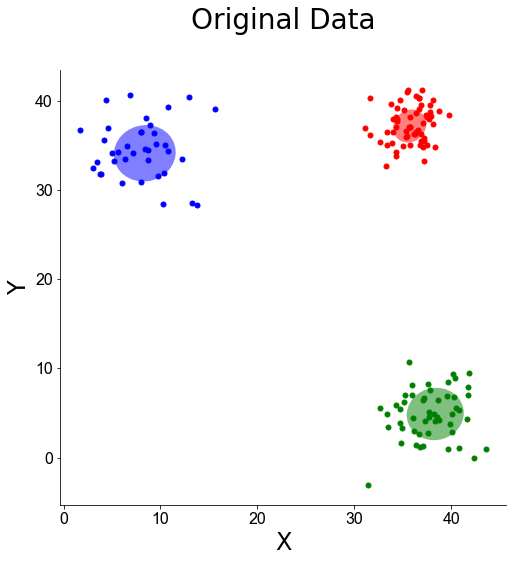

In [30]:
plotsize = 8
sizeMean = 10
text_size = 16
axis_font = {'size':'24'}
Title_font = {'size':'28'}
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
for i in range(NClasses):
      
    # the sd with ellipses
    # central point of the error ellipse
    pos = [Mu[i][0],Mu[i][1]]

    # for the angle we need the eigenvectors of the covariance matrix
    w,ve = np.linalg.eig(Cov[i][0:2,0:2])

    # We pick the largest eigen value
    order = w.argsort()[::-1]
    w = w[order]
    ve = ve[:,order]

    # we compute the angle towards the eigen vector with the largest eigen value
    theta = np.degrees(np.arctan(ve[1,0]/ve[0,0]))

    # Compute the width and height of the ellipse based on the eigen values (ie the length of the vectors)
    width, height = 2 * np.sqrt(w)

    # making the ellipse
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta)
    ellip.set_alpha(0.5)
    ellip.set_facecolor(color[i])
             
    ax.plot(data_sample[i][:,0],data_sample[i][:,1], '.', c=color[i], markersize=sizeMean)
    ax.add_artist(ellip)
        
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Y', **axis_font)
ax.set_xlabel('X', **axis_font)
ax.set_title('Original Data', y=1.08, **Title_font)
ax.figure.set_size_inches(plotsize,plotsize)

plt.show()

## 2. 데이터 random한 순서로 섞기

In [31]:
# data를 array로
y = np.empty([1, Ndim])
for i in range(NClasses):
    y = np.vstack((y,data_sample[i]))  
y = np.delete(y, 0, axis=0)
# 데이터들에 클래스 할당하기
v_true = np.zeros((1)) 
for i,j in enumerate(r):
    v_true = np.hstack((v_true, np.repeat(i+1, j)))

v_true = np.array([v_true[1:]])
y_true = np.concatenate((y, v_true.T), axis=1)
print(y_true)

# 데이터 섞기
np.random.shuffle(y_true)

y = y_true[:,0:-1]

print ('The data:')
print (y)

[[ 8.74469472 33.30762407  1.        ]
 [ 4.9477898  34.1712211   1.        ]
 [ 5.17429606 33.19034007  1.        ]
 [ 8.66553574 34.47403019  1.        ]
 [ 9.30998055 36.33475994  1.        ]
 [ 6.52560418 34.91887917  1.        ]
 [ 6.07616744 30.71472968  1.        ]
 [ 9.69706607 31.49844643  1.        ]
 [ 6.86214687 40.60451856  1.        ]
 [ 8.37208836 34.60900311  1.        ]
 [ 4.13190291 35.60512669  1.        ]
 [ 8.92583533 37.26959484  1.        ]
 [12.22205838 33.47504614  1.        ]
 [ 4.55934682 36.88511386  1.        ]
 [ 8.01315326 30.89247677  1.        ]
 [ 7.97246092 36.53095223  1.        ]
 [ 5.60589935 34.22504924  1.        ]
 [15.61022955 39.0146853   1.        ]
 [10.73429025 34.32281557  1.        ]
 [ 8.47848751 38.04849742  1.        ]
 [ 6.37566218 33.43899376  1.        ]
 [ 3.42201127 33.09956667  1.        ]
 [10.32140801 31.93402807  1.        ]
 [ 1.71812831 36.66189893  1.        ]
 [10.28325017 28.37950183  1.        ]
 [ 2.99900876 32.49973901

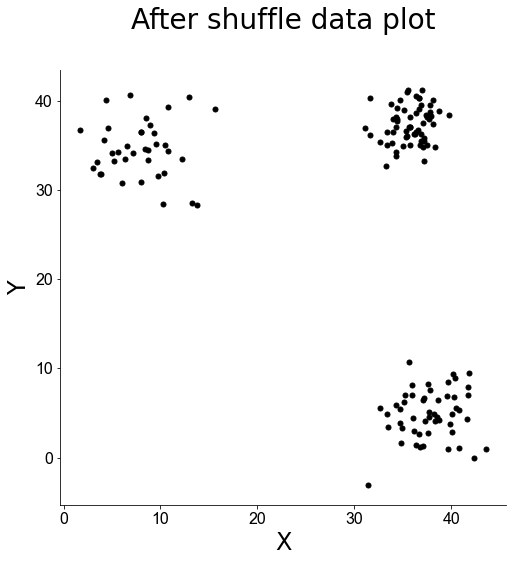

In [32]:
plotsize = 8
sizeMean = 10
text_size = 16
axis_font = {'size':'24'}
Title_font = {'size':'28'}

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(y[:,0],y[:,1], 'k.', markersize=sizeMean)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Y', **axis_font)
ax.set_xlabel('X', **axis_font)
ax.set_title('After shuffle data plot', y=1.08, **Title_font)
ax.figure.set_size_inches(plotsize,plotsize)

plt.show()

## 3. E-step, M-step 정의

### mean, covariance matrix 초기화

In [33]:
# 처음 Mean과 Covariance 행렬을 random으로 만들어두고
# 초기 확률 w는 위에서 뽑은 class별 선택될 확률과 동일

initMu = np.empty([NClasses, Ndim])
initCov = np.empty([Ndim, Ndim, NClasses])

for j in range(NClasses):
    
    initMu[j,:] = np.random.uniform(0.0, 50.0, Ndim)
    sd = np.random.uniform(1.0,10.0)
    initCov[:,:,j] = makeSDmatrix(Ndim,sd)

a = np.ones(NClasses)
n = 1
p = len(a)
rd = np.random.gamma(np.repeat(a,n),n,p)
rd = np.divide(rd,np.repeat(np.sum(rd),p))
initW = rd

### E-step

In [34]:
def EStep(y, w, mu, cov):
    
    r_ij = np.zeros((y.shape[0], mu.shape[0]))

    for Object in range(y.shape[0]):
        r_ij_Sumj = np.zeros(mu.shape[0])
        
        for jClass in range(mu.shape[0]):
            r_ij_Sumj[jClass] = w[jClass]* sc.stats.multivariate_normal.pdf(y[Object,:], mu[jClass,:], cov[:,:,jClass])
        
        for jClass in range(r_ij_Sumj.shape[0]):
            r_ij[Object,jClass] =   r_ij_Sumj[jClass] / np.sum(r_ij_Sumj)
    
    return r_ij

### M-step

In [35]:
def MStep(r, y, mu, cov):
    
    N = y.shape[0]
    
    Allmu_j = np.zeros((N, mu.shape[0], mu.shape[1]))
    Allcov_j = np.zeros((N, cov.shape[0], cov.shape[1], cov.shape[2]))
    mu_j = np.zeros((mu.shape[0], mu.shape[1]))
    cov_j = np.zeros((cov.shape[0], cov.shape[1], cov.shape[2]))
    
    # weight 업데이트
    w_j = np.sum(r, axis=0) / N
    
    # mean : mu_j
    for Object in range(N):
        Allmu_j[Object,:,:]=np.asmatrix(r[Object,:]).T*y[Object,:]
    
    for j in range(cov.shape[2]):
        mu_j[j,:] = (np.sum(Allmu_j, axis=0)[j,:])/(np.sum(r, axis=0)[j])
        
    # covariance : cov_j
    for Object in range(N):
        for j in range(cov.shape[2]):
            Allcov_j[Object,:,:,j] = r[Object,j]*np.asmatrix(y[Object,:]-mu_j[j,:]).T*np.asmatrix(y[Object,:]-mu_j[j,:])
            
    for j in range(cov.shape[2]):
        cov_j[:,:,j] = (np.sum(Allcov_j, axis=0)[:,:,j])/(np.sum(r,axis=0)[j])
    
    return w_j,mu_j,cov_j

### 1번 실행해 보기

In [36]:
r_n = EStep(y, initW, initMu, initCov)
print ('r_n : ', r_n)
print ('r_n shape : ', r_n.shape)

r_n :  [[5.42125888e-53 1.00000000e+00 6.98486008e-12]
 [9.03460742e-54 1.00000000e+00 4.55464693e-12]
 [1.00000000e+00 2.07943931e-16 4.39328738e-11]
 [4.72328191e-65 9.85942039e-01 1.40579609e-02]
 [1.53292708e-55 1.00000000e+00 9.21829798e-13]
 [9.99999999e-01 1.40393226e-14 5.03213689e-10]
 [2.37154520e-59 9.99816938e-01 1.83061801e-04]
 [1.00000000e+00 8.66514803e-24 2.27208304e-15]
 [1.00000000e+00 7.57314241e-22 2.31397094e-14]
 [4.30149534e-36 1.82829666e-01 8.17170334e-01]
 [1.53471972e-64 1.00000000e+00 1.52526158e-14]
 [3.73776789e-46 4.92766543e-02 9.50723346e-01]
 [1.06215955e-65 1.00000000e+00 5.70335394e-15]
 [1.00000000e+00 3.55810272e-28 7.74532984e-18]
 [1.00000000e+00 1.03938776e-28 4.03461662e-18]
 [1.00000000e+00 4.85379471e-20 3.20513366e-13]
 [3.71198776e-56 8.98673480e-02 9.10132652e-01]
 [4.48672652e-45 9.40917300e-01 5.90826997e-02]
 [3.67331279e-52 1.00000000e+00 1.69643363e-12]
 [9.99999668e-01 4.77668100e-10 3.31850453e-07]
 [1.33955149e-45 1.00000000e+00 2

In [37]:
w_n,mu_n,cov_n = MStep(r_n, y, initMu, initCov)
print ('wn : \n',w_n)
print ('mu_n : \n',mu_n)
print ('cov_n : \n',cov_n.T)
print ('wn.shape : ',w_n.shape)
print ('mu_n.shape : ',mu_n.shape)
print ('cov_n.shape : ',cov_n.shape)

wn : 
 [0.34       0.52594435 0.13405566]
mu_n : 
 [[37.81258618  4.87902567]
 [30.10447187 37.19499022]
 [ 6.86109149 32.58477453]]
cov_n : 
 [[[  7.39514236   1.06224675]
  [  1.06224675   7.51216764]]

 [[123.18393978   2.65292859]
  [  2.65292859   4.56618695]]

 [[ 10.65723823  -4.97396335]
  [ -4.97396335   5.56542582]]]
wn.shape :  (3,)
mu_n.shape :  (3, 2)
cov_n.shape :  (2, 2, 3)


## 4. EM Algorithm
- 수렴 조건 : 현재 log likelihood와 이전 log likelihood 차이가 10^(-5) 미만이면 stop

In [38]:
EMiteration = 2000

# starting values    
r_n = EStep(y, initW, initMu, initCov)
w_n,mu_n,cov_n = MStep(r_n, y, initMu, initCov)
    
logLH = -1000000000000
        
for i in range(EMiteration):
    # E step
    r_n = EStep(y, w_n, mu_n,cov_n)

    # M step
    w_n,mu_n,sigma_n = MStep(r_n, y, mu_n, cov_n)

    # log likelihood
    logLall = np.zeros((y.shape[0]))

    for Object in range(y.shape[0]):
        LH = np.zeros(NClasses)

        for jClass in range(NClasses):
            LH[jClass] = w_n[jClass]* sc.stats.multivariate_normal.pdf(y[Object,:], mu_n[jClass,:], cov_n[:,:,jClass])

        logLall[Object] = np.log(np.sum(LH))

    logL = np.sum(logLall)

    if logL > logLH:
        # 수렴조건을 둘 차이가 10^(-4) 미만일때로 설정
        if (logL-logLH<10**(-6)):
            print('둘 차이가 매우 적음')
            break
        else :
            logLH = logL
            print ('found larger: ', logLH)
            w_p = w_n
            mu_p = mu_n
            sigma_p = sigma_n
            r_p = r_n
print('final log likelihood : ', logLH)

found larger:  -944.8880343349608
found larger:  -943.6039281482466
found larger:  -943.0201705282799
found larger:  -942.7898730171469
found larger:  -942.7093447990576
found larger:  -942.6834661603111
found larger:  -942.6755750447578
found larger:  -942.6732409892027
found larger:  -942.6725622536285
found larger:  -942.6723667061278
found larger:  -942.6723106503608
found larger:  -942.6722946247535
found larger:  -942.6722900498736
found larger:  -942.6722887448797
둘 차이가 매우 적음
final log likelihood :  -942.6722887448797


### EM algorithm 이후 예측된 class 분포

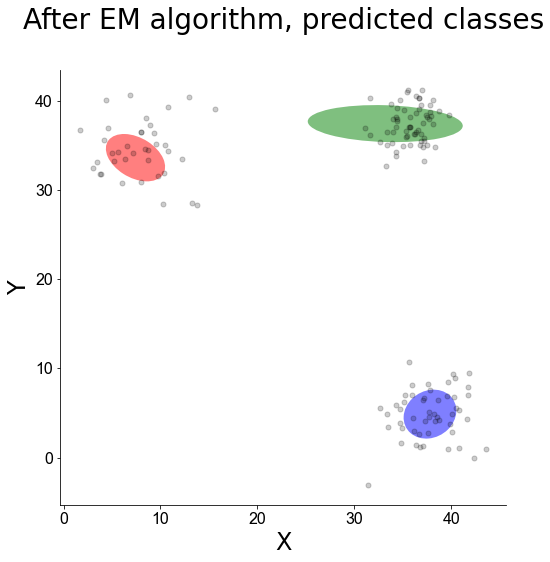

In [39]:
plotsize = 8
sizeMean = 10
text_size = 16
axis_font = {'size':'24'}
Title_font = {'size':'28'}
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(y[:,0],y[:,1], 'k.', markersize=sizeMean, alpha=0.2)
for i in range(NClasses):
      
    # the sd with ellipses
    # central point of the error ellipse
    pos = [mu_p[i,0],mu_p[i,1]]

    # for the angle we need the eigenvectors of the covariance matrix
    w,ve = np.linalg.eig(sigma_p[0:2,0:2,i])

    # We pick the largest eigen value
    order = w.argsort()[::-1]
    w = w[order]
    ve = ve[:,order]

    # we compute the angle towards the eigen vector with the largest eigen value
    theta = np.degrees(np.arctan(ve[1,0]/ve[0,0]))

    # Compute the width and height of the ellipse based on the eigen values (ie the length of the vectors)
    width, height = 2 * np.sqrt(w)

    # making the ellipse
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta)
    ellip.set_alpha(0.5)
    ellip.set_facecolor(color[i])
             
    ax.add_artist(ellip)
        
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Y', **axis_font)
ax.set_xlabel('X', **axis_font)
ax.set_title('After EM algorithm, predicted classes', y=1.08, **Title_font)
ax.figure.set_size_inches(plotsize,plotsize)

plt.show()

## 5. 결과

### 시행 중에 class가 random 순서로 배정되어서 가장 정확도가 높은 순서로 r_p 정렬하기

In [40]:
a=list(range(NClasses))
permute = list(permutations(a,NClasses))
permute_=[]
acc_list=[]
permute_list=[]
r_list=[]
# 모든 permutation을 고려해 정확도 구하여서 가장 높은 정확도를 가지는 permutation 찾기
for i in range(len(permute)):
    
    Gorder = list(permute[i])
    permute_.append(Gorder)
    
    r_=[]
    reorder = r_p[:,Gorder]
    inf = np.argmax(reorder, axis=1)
    r_.append(inf+1)
    
    Clust=y_true[:,2]==inf+1
    now_acc=np.mean(Clust)
    acc_list=np.append(acc_list, now_acc)
    permute_list.append(list)
    r_list.append(r_)
acc=max(acc_list)
index=np.argmax(acc_list)
print('accuracy : ',acc)
print('가장 높은 정확도를 가지는 permutation : ', permute[index])
print('예측 class : \n ',r_list[index])

accuracy :  0.96
가장 높은 정확도를 가지는 permutation :  (2, 0, 1)
예측 class : 
  [array([3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 1, 3, 2, 2, 2, 1, 1, 3, 2, 3, 1,
       3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 2, 2,
       3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1,
       2, 1, 3, 3, 2, 1, 1, 3, 2, 3, 1, 3, 1, 3, 2, 2, 3, 2, 2, 2, 3, 3,
       3, 1, 3, 2, 3, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 2, 3, 2, 1, 3, 3, 1, 2, 2, 2, 3, 1, 3, 2, 2, 3, 2, 3,
       1, 3, 3, 2, 1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 3, 1, 2], dtype=int64)]


### mean, 확률, Covariance matrix 정렬

In [41]:
order = list(permute[index])
mu_order=mu_p[order,:]
w_order=w_p[order]
sigma_order = sigma_p[:,:,order]

### 예측값과 실제값 비교

In [42]:
print ('예측 : class 별 선택될 확률: ',w_order)
print ('실제 : class 별 선택될 확률 ',alpha)

예측 : class 별 선택될 확률:  [0.20005834 0.34       0.45994166]
실제 : class 별 선택될 확률  [0.33333333 0.33333333 0.33333333]


In [43]:
for i in range(0,NClasses):
    print (['예측 : class'+ str(i+1)+'별 means'], mu_order[i,:])
print ('------------------')
for i in range(0,NClasses):
    print (['실제 : class'+ str(i+1)+'별 means'], Mu[i])

['예측 : class1별 means'] [ 7.41991759 33.59982623]
['예측 : class2별 means'] [37.81258621  4.8790257 ]
['예측 : class3별 means'] [33.19688065 37.41505534]
------------------
['실제 : class1별 means'] [ 8.37686321 34.0900392 ]
['실제 : class2별 means'] [38.35920748  4.89176829]
['실제 : class3별 means'] [35.72596848 37.14536132]


In [44]:
for i in range(0,NClasses):
    print (['예측 : class'+ str(i+1)+'의 variances' ])
    print (sigma_order[:,:,i])
print ('------------------')
for i in range(0,NClasses):
    print (['실제 : class'+ str(i+1)+'의 variances'])
    print (Cov[i])

['예측 : class1의 variances']
[[ 9.34554398 -3.13780594]
 [-3.13780594  7.03439672]]
['예측 : class2의 variances']
[[7.39514242 1.06224687]
 [1.06224687 7.51216774]]
['예측 : class3의 variances']
[[63.97521806 -1.97296688]
 [-1.97296688  4.30817028]]
------------------
['실제 : class1의 variances']
[[10.1735151   0.42426091]
 [ 0.42426091  9.97443803]]
['실제 : class2의 variances']
[[8.66432542 0.35417165]
 [0.35417165 8.58652965]]
['실제 : class3의 variances']
[[2.89931198 0.38851103]
 [0.38851103 3.42154882]]


### 실제 class

In [45]:
y_true[:,2]

array([3., 3., 2., 1., 3., 2., 1., 2., 2., 1., 3., 1., 3., 2., 2., 2., 1.,
       1., 3., 2., 3., 1., 3., 3., 2., 2., 2., 2., 2., 1., 2., 2., 3., 2.,
       3., 1., 1., 2., 3., 3., 1., 3., 2., 2., 3., 2., 3., 3., 3., 2., 3.,
       1., 2., 1., 3., 2., 1., 3., 3., 3., 2., 3., 2., 3., 3., 1., 2., 1.,
       3., 3., 2., 1., 1., 1., 2., 3., 1., 3., 1., 3., 2., 2., 3., 2., 2.,
       2., 3., 3., 3., 1., 3., 2., 3., 3., 1., 1., 3., 2., 3., 3., 1., 2.,
       2., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2., 3., 2., 1., 3.,
       3., 1., 2., 2., 2., 3., 1., 3., 2., 2., 3., 2., 3., 1., 3., 3., 2.,
       1., 2., 1., 2., 3., 1., 2., 1., 1., 1., 1., 3., 1., 2.])

### 예측 class

In [46]:
r_list[index]

[array([3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 1, 3, 2, 2, 2, 1, 1, 3, 2, 3, 1,
        3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 2, 2,
        3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1,
        2, 1, 3, 3, 2, 1, 1, 3, 2, 3, 1, 3, 1, 3, 2, 2, 3, 2, 2, 2, 3, 3,
        3, 1, 3, 2, 3, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 3, 3, 3, 3, 3, 2,
        3, 3, 3, 3, 2, 3, 2, 1, 3, 3, 1, 2, 2, 2, 3, 1, 3, 2, 2, 3, 2, 3,
        1, 3, 3, 2, 1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 3, 1, 2], dtype=int64)]

### 정확도

In [47]:
print('정확도 : ', acc*100)

정확도 :  96.0


## 원래 class, 예측 class 비교

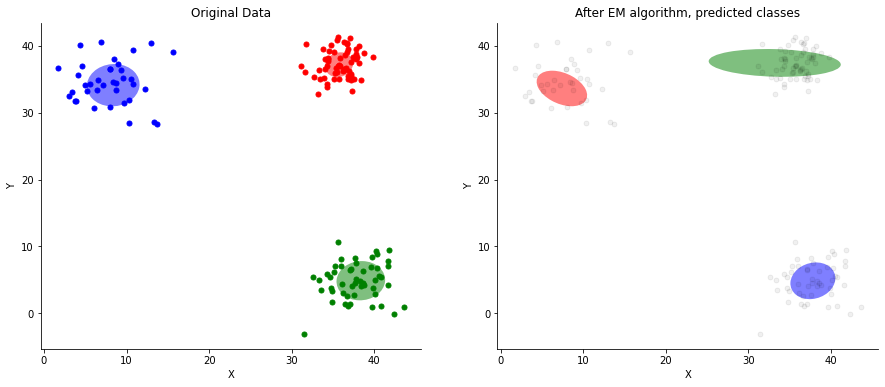

In [48]:
fig = plt.figure(figsize=(15,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
plotsize=8
sizeMean = 10
text_size = 16
axis_font = {'size':'24'}
Title_font = {'size':'28'}
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(NClasses):
    pos = [Mu[i][0],Mu[i][1]]
    w,ve = np.linalg.eig(Cov[i][0:2,0:2])
    order = w.argsort()[::-1]
    w = w[order]
    ve = ve[:,order]
    theta = np.degrees(np.arctan(ve[1,0]/ve[0,0]))
    width, height = 2 * np.sqrt(w)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta)
    ellip.set_alpha(0.5)
    ellip.set_facecolor(color[i])
    ax1.plot(data_sample[i][:,0],data_sample[i][:,1], '.', c=color[i], markersize=sizeMean)
    ax1.add_artist(ellip)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_ylabel('Y')
ax1.set_xlabel('X')
ax1.set_title('Original Data')


for i in range(NClasses):
    pos = [mu_p[i][0],mu_p[i][1]]
    w,ve = np.linalg.eig(sigma_p[0:2,0:2,i])
    order = w.argsort()[::-1]
    w = w[order]
    ve = ve[:,order]
    theta = np.degrees(np.arctan(ve[1,0]/ve[0,0]))
    width, height = 2 * np.sqrt(w)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta)
    ellip.set_alpha(0.5)
    ellip.set_facecolor(color[i])
    ax2.plot(y[:,0],y[:,1], 'k.', markersize=sizeMean, alpha=0.02)
    ax2.add_artist(ellip)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.set_ylabel('Y')
ax2.set_xlabel('X')
ax2.set_title('After EM algorithm, predicted classes')
plt.show()